In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

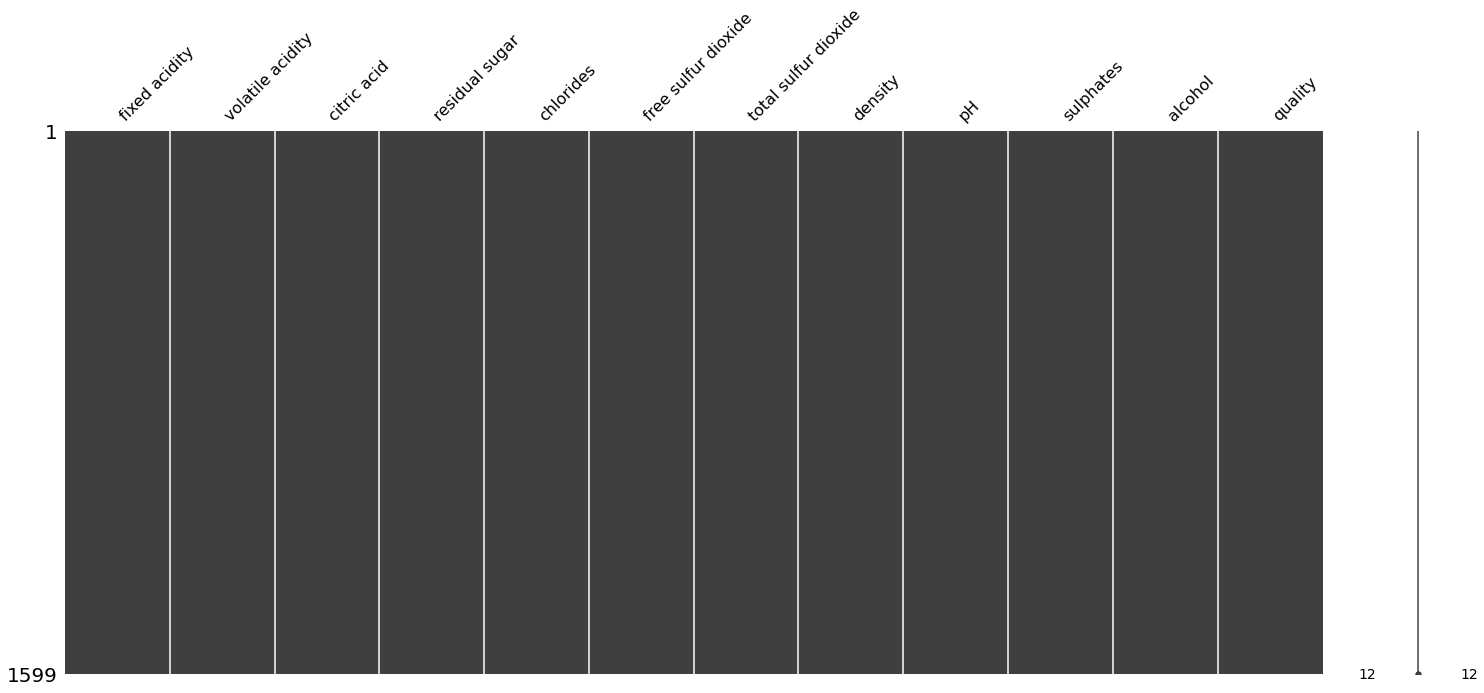

In [4]:
msno.matrix(data)

<AxesSubplot:xlabel='quality', ylabel='count'>

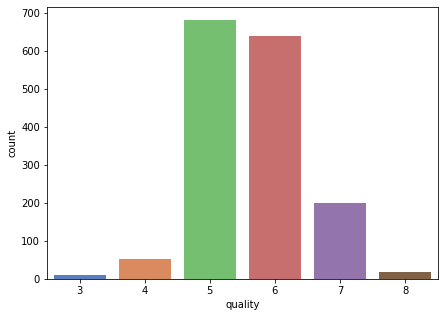

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(x= data['quality'], palette= 'muted')

In [6]:
data.corr()['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

<AxesSubplot:>

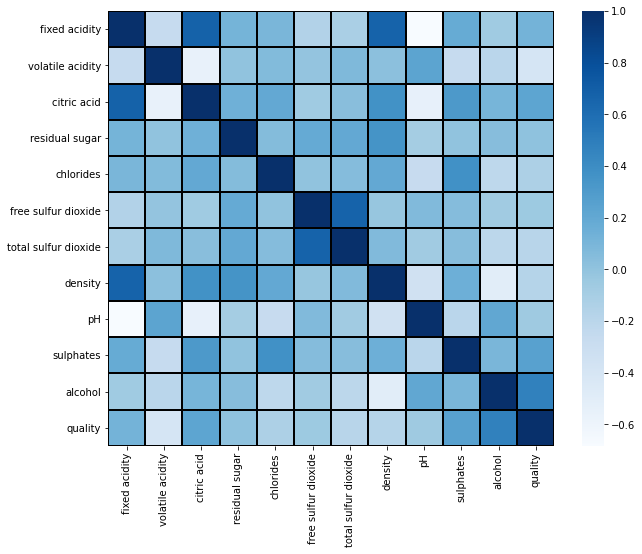

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Blues',linewidth=2,linecolor= 'Black')

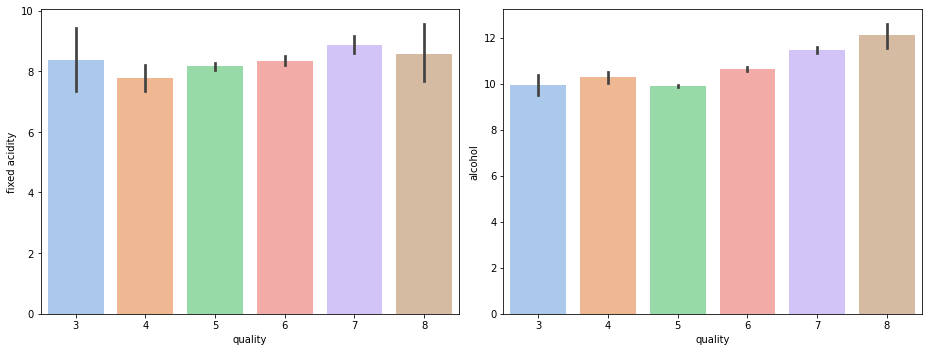

In [8]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(x='quality',y='fixed acidity',data=data,palette='pastel')
plt.subplot(1,2,2)
sns.barplot(x='quality', y='alcohol', data=data, palette='pastel')
plt.tight_layout()

In [9]:
data['quality']= [1 if i >6.5 else 0 for i in data['quality']]
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

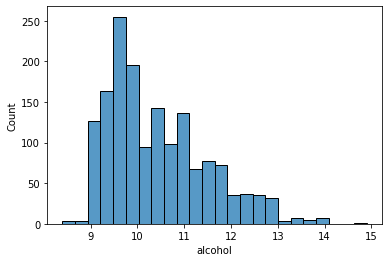

In [10]:
sns.histplot(data['alcohol'],palette= 'dark')

<AxesSubplot:xlabel='fixed acidity'>

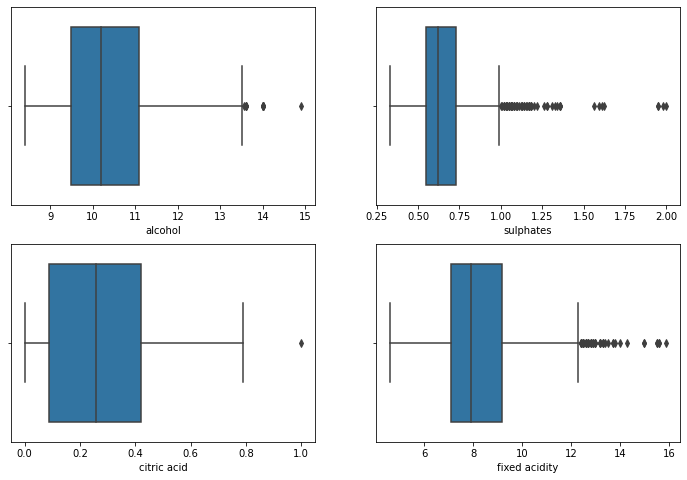

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=data['alcohol'])
plt.subplot(2,2,2)
sns.boxplot(x=data['sulphates'])
plt.subplot(2,2,3)
sns.boxplot(x=data['citric acid'])
plt.subplot(2,2,4)
sns.boxplot(x=data['fixed acidity'])

<AxesSubplot:xlabel='chlorides'>

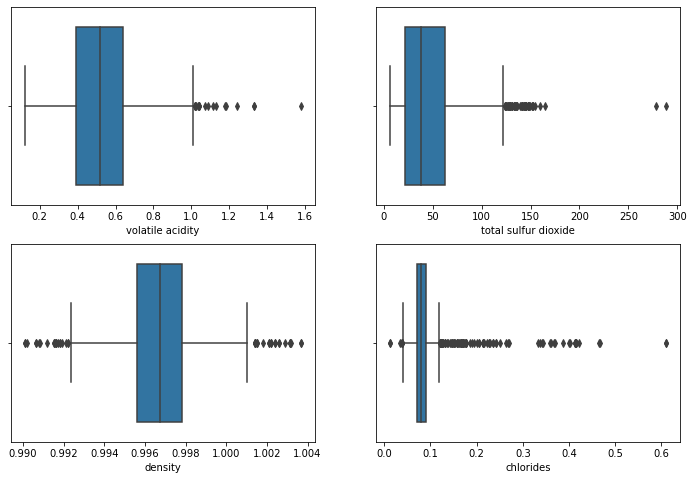

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(x=data['volatile acidity'])
plt.subplot(2,2,2)
sns.boxplot(x=data['total sulfur dioxide'])
plt.subplot(2,2,3)
sns.boxplot(x=data['density'])
plt.subplot(2,2,4)
sns.boxplot(x=data['chlorides'])

In [13]:
data['zscore']= ((data['citric acid'] - data['citric acid'].mean())/data['citric acid'].std())

In [14]:
filt = np.abs(data['zscore'])<3
data = data[filt]

In [15]:
data['zscore2']= ((data['alcohol'] - data['alcohol'].mean())/data['alcohol'].std())
filt = np.abs(data['zscore2'])<3
data = data[filt]
data['zscore3']=((data['total sulfur dioxide']-data['total sulfur dioxide'].mean())/data['total sulfur dioxide'].std())
filt=np.abs(data['zscore3'])<3
data=data[filt]

In [16]:
X= data.drop(['quality','zscore','zscore2','zscore3'], axis=1)
y=data['quality']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 41)

In [18]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
x_train = scaling.fit_transform(X_train)
x_test = scaling.fit_transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Logistic Regression**

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8984126984126984

**Decision Tree Classifier**

In [21]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8539682539682539

**SVC**

In [22]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9079365079365079

**KNN**

In [23]:
for i in range(1,40):
    model=KNeighborsClassifier( n_neighbors=i,metric='manhattan')
    model.fit(x_train,y_train)
    print(i+model.score(x_test,y_test))

1.892063492063492
2.895238095238095
3.907936507936508
4.898412698412699
5.898412698412699
6.8920634920634924
7.901587301587302
8.911111111111111
9.907936507936508
10.904761904761905
11.907936507936508
12.898412698412699
13.901587301587302
14.901587301587302
15.904761904761905
16.901587301587302
17.901587301587302
18.8984126984127
19.892063492063492
20.88888888888889
21.892063492063492
22.88888888888889
23.892063492063492
24.895238095238096
25.88888888888889
26.892063492063492
27.88888888888889
28.892063492063492
29.892063492063492
30.892063492063492
31.892063492063492
32.888888888888886
33.89206349206349
34.888888888888886
35.89206349206349
36.89206349206349
37.8984126984127
38.89523809523809
39.89523809523809


In [24]:
model=KNeighborsClassifier( n_neighbors=8,metric='manhattan')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9111111111111111

KNN has the highest accuracy